In [ ]:
#@title Copyright 2023 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Convert 2D image to 1D
    Dense(128, activation='relu'),     # First hidden layer
    Dense(64, activation='relu'),      # Second hidden layer
    Dense(10, activation='softmax')    # Output layer (10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8748 - loss: 0.4333 - val_accuracy: 0.9653 - val_loss: 0.1205
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9657 - loss: 0.1141 - val_accuracy: 0.9705 - val_loss: 0.1011
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9768 - loss: 0.0749 - val_accuracy: 0.9755 - val_loss: 0.0816
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9834 - loss: 0.0523 - val_accuracy: 0.9760 - val_loss: 0.0862
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.0421 - val_accuracy: 0.9765 - val_loss: 0.0811
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9895 - loss: 0.0337 - val_accuracy: 0.9733 - val_loss: 0.1092
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9905 - loss: 0.0288 - val_accuracy: 0.9755 - val_loss: 0.0998
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9921 - loss: 0.0232 

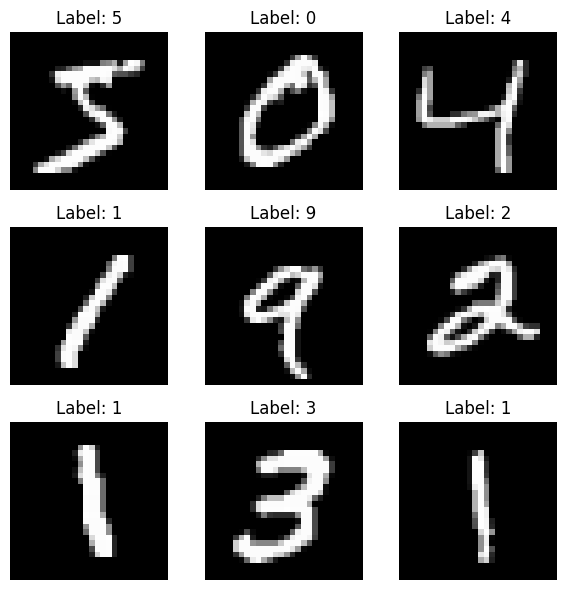

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (_, _) = mnist.load_data()

# Plot first 9 images with their labels
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


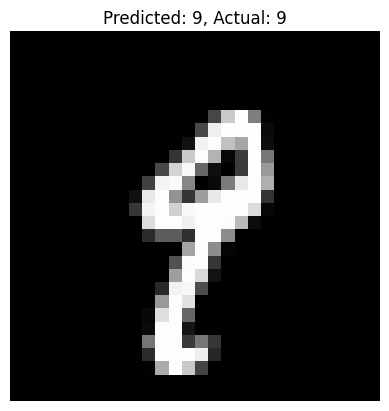

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Pick an image from test set (e.g., index 0)
index = 78
img = x_test[index].reshape(1, 28, 28)  # Reshape for model input

# Predict
pred = model.predict(img)
predicted_digit = np.argmax(pred)

# Display image and prediction
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Predicted: {predicted_digit}, Actual: {np.argmax(y_test[index])}")
plt.axis('off')
plt.show()


In [38]:
from google.colab import files
uploaded = files.upload()

Saving Image Test.png to Image Test (6).png


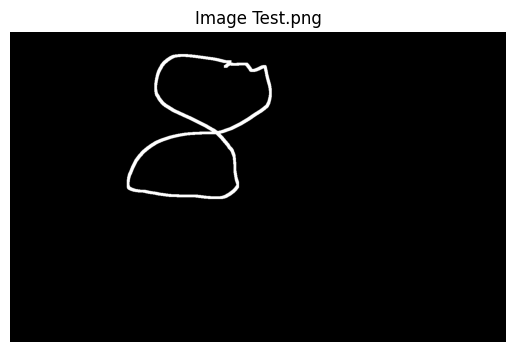

In [39]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open("Image Test (6).png")

# Display it
plt.imshow(img, cmap='gray')
plt.title("Image Test.png")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


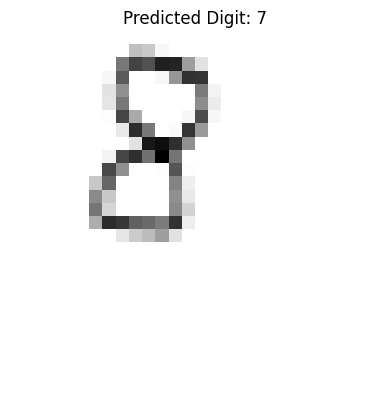

In [40]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
img = Image.open("Image Test (6).png").convert("L")  # Grayscale
img = ImageOps.invert(img)                                 # Invert: white digit on black
img = img.resize((28, 28))                                 # Resize to 28x28
img_array = np.array(img) / 255.0                          # Normalize
img_input = img_array.reshape(1, 28, 28)                   # Reshape for model

# Predict using trained model
prediction = model.predict(img_input)
predicted_class = np.argmax(prediction)

# Show the result
plt.imshow(img_array, cmap='gray')
plt.title(f"Predicted Digit: {predicted_class}")
plt.axis('off')
plt.show()
